# Handling Categorical Data in Python
### Learn the common tricks to handle categorical data and preprocess it to build machine learning models!

If you are familiar with machine learning, you will probably have encountered categorical features in many datasets. These generally include different categories or levels associated with the observation, which are non-numerical and thus need to be converted so the computer can process them.

In this tutorial, you’ll learn the common tricks to handle this type of data and preprocess it to build machine learning models with them. More specifically, you will learn:

* The difference between categorical and continuous data in your dataset and identifying the type of data.
* to do basic exploration of such data to extract information from it.
* You will learn more about various encoding techniques in machine learning for categorical data in Python.
* Lastly, you'll explore how you can deal with categorical features in big data with Spark: you'll see how you can apply the encoding techniques in PySpark.

This tutorial covers the operations you have perform on categorical data before it can be used in an ML algorithm. But there is more to it. You will also have to clean your data.


## Identifying Categorical Data: Nominal, Ordinal and Continuous
Categorical features can only take on a limited, and usually fixed, number of possible values. For example, if a dataset is about information related to users, then you will typically find features like country, gender, age group, etc. Alternatively, if the data you're working with is related to products, you will find features like product type, manufacturer, seller and so on.

These are all categorical features in your dataset. These features are typically stored as text values which represent various traits of the observations. For example, gender is described as Male (M) or Female (F), product type could be described as electronics, apparels, food etc.

Note that these type of features where the categories are only labeled without any order of precedence are called nominal features.

Features which have some order associated with them are called ordinal features. For example, a feature like economic status, with three categories: low, medium and high, which have an order associated with them.

There are also continuous features. These are numeric variables that have an infinite number of values between any two values. A continuous variable can be numeric or a date/time.

Regardless of what the value is used for, the challenge is determining how to use this data in the analysis because of the following constraints:

* Categorical features may have a very large number of levels, known as high cardinality, (for example, cities or URLs), where most of the levels appear in a relatively small number of instances.
* Many machine learning models, such as regression or SVM, are algebraic. This means that their input must be numerical. To use these models, categories must be transformed into numbers first, before you can apply the learning algorithm on them.
* While some ML packages or libraries might transform categorical data to numeric automatically based on some default embedding method, many other ML packages don’t support such inputs.
* For the machine, categorical data doesn’t contain the same context or information that humans can easily associate and understand. For example, when looking at a feature called City with three cities `New York`, `New Jersey` and `New Delhi`, humans can infer that New York is closely related to New Jersey as they are from same country, while New York and New Delhi are much different. But for the model, New York, New Jersey and New Delhi, are just three different levels (possible values) of the same feature `City`. If you don’t specify the additional contextual information, it will be impossible for the model to differentiate between highly different levels.

You therefore are faced with the challenge of figuring out how to turn these text values into numerical values for further processing and unmask lots of interesting information which these features might hide. Typically, any standard work-flow in feature engineering involves some form of transformation of these categorical values into numeric labels and then applying some encoding scheme on these values.


## General Exploration steps for Categorical Data
In this section, you'll focus on dealing with categorical features in the `pnwflights14` dataset, but you can apply the same procedure to all kinds of datasets. `pnwflights14` is a modified version of Hadley Wickham's `nycflights13` dataset and contains information about all flights that departed from the two major airports of the Pacific Northwest (PNW), SEA in Seattle and PDX in Portland, in 2014: 162,049 flights in total.

To help understand what causes delays, it also includes a number of other useful datasets:

* `weather`: the hourly meteorological data for each airport
* `planes`: constructor information about each plane
* `airports`: airport names and locations
* `airlines`: translation between two letter carrier codes and names


Since it's always a good idea to understand before starting working on it, you'll briefly explore the data! To do this, you will first import the basic libraries that you will be using throughout the tutorial, namely `pandas`, `numpy` and `copy`.

Also make sure that you set Matplotlib to plot inline, which means that the outputted plot will appear immediately under each code cell.

In [1]:
import pandas as pd
import numpy as np
import copy
%matplotlib inline

In [2]:
df_flights = pd.read_csv('https://raw.githubusercontent.com/ismayc/pnwflights14/master/data/flights.csv')

df_flights.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2014,1,1,1.0,96.0,235.0,70.0,AS,N508AS,145,PDX,ANC,194.0,1542,0.0,1.0
1,2014,1,1,4.0,-6.0,738.0,-23.0,US,N195UW,1830,SEA,CLT,252.0,2279,0.0,4.0
2,2014,1,1,8.0,13.0,548.0,-4.0,UA,N37422,1609,PDX,IAH,201.0,1825,0.0,8.0
3,2014,1,1,28.0,-2.0,800.0,-23.0,US,N547UW,466,PDX,CLT,251.0,2282,0.0,28.0
4,2014,1,1,34.0,44.0,325.0,43.0,AS,N762AS,121,SEA,ANC,201.0,1448,0.0,34.0


In [3]:
print(df_flights.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162049 entries, 0 to 162048
Data columns (total 16 columns):
year         162049 non-null int64
month        162049 non-null int64
day          162049 non-null int64
dep_time     161192 non-null float64
dep_delay    161192 non-null float64
arr_time     161061 non-null float64
arr_delay    160748 non-null float64
carrier      162049 non-null object
tailnum      161801 non-null object
flight       162049 non-null int64
origin       162049 non-null object
dest         162049 non-null object
air_time     160748 non-null float64
distance     162049 non-null int64
hour         161192 non-null float64
minute       161192 non-null float64
dtypes: float64(7), int64(5), object(4)
memory usage: 19.8+ MB
None


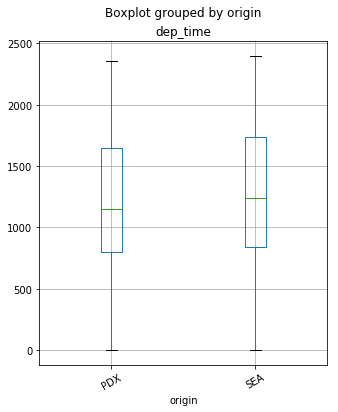

In [4]:
df_flights.boxplot('dep_time','origin',rot = 30,figsize=(5,6))

In [5]:
cat_df_flights = df_flights.select_dtypes(include=['object']).copy()
cat_df_flights.head()

,carrier,tailnum,origin,dest
0,AS,N508AS,PDX,ANC
1,US,N195UW,SEA,CLT
2,UA,N37422,PDX,IAH
3,US,N547UW,PDX,CLT
4,AS,N762AS,SEA,ANC


In [6]:
print(cat_df_flights.isnull().values.sum())

248


In [7]:
print(cat_df_flights.isnull().sum())

carrier      0
tailnum    248
origin       0
dest         0
dtype: int64


In [8]:
cat_df_flights = cat_df_flights.fillna(cat_df_flights['tailnum'].value_counts().index[0])

In [9]:
print(cat_df_flights.isnull().values.sum())

0


In [10]:
print(cat_df_flights['carrier'].value_counts())

AS    62460
WN    23355
OO    18710
DL    16716
UA    16671
AA     7586
US     5946
B6     3540
VX     3272
F9     2698
HA     1095
Name: carrier, dtype: int64


In [11]:
print(cat_df_flights['carrier'].value_counts().count())

11


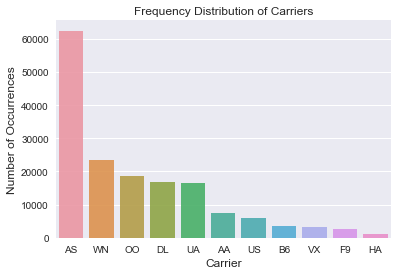

In [12]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
carrier_count = cat_df_flights['carrier'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.show()

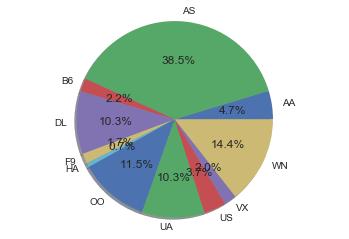

In [13]:
labels = cat_df_flights['carrier'].astype('category').cat.categories.tolist()
counts = cat_df_flights['carrier'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [14]:
replace_map = {'carrier': {'AA': 1, 'AS': 2, 'B6': 3, 'DL': 4,
                                  'F9': 5, 'HA': 6, 'OO': 7 , 'UA': 8 , 'US': 9,'VX': 10,'WN': 11}}

In [15]:
labels = cat_df_flights['carrier'].astype('category').cat.categories.tolist()
replace_map_comp = {'carrier' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp)

{'carrier': {'AA': 1, 'AS': 2, 'B6': 3, 'DL': 4, 'F9': 5, 'HA': 6, 'OO': 7, 'UA': 8, 'US': 9, 'VX': 10, 'WN': 11}}


In [16]:
cat_df_flights_replace = cat_df_flights.copy()

In [17]:
cat_df_flights_replace.replace(replace_map_comp, inplace=True)

print(cat_df_flights_replace.head())

   carrier tailnum origin dest
0        2  N508AS    PDX  ANC
1        9  N195UW    SEA  CLT
2        8  N37422    PDX  IAH
3        9  N547UW    PDX  CLT
4        2  N762AS    SEA  ANC


In [18]:
print(cat_df_flights_replace['carrier'].dtypes)

int64


In [19]:
cat_df_flights_lc = cat_df_flights.copy()
cat_df_flights_lc['carrier'] = cat_df_flights_lc['carrier'].astype('category')
cat_df_flights_lc['origin'] = cat_df_flights_lc['origin'].astype('category')                                                              

print(cat_df_flights_lc.dtypes)

carrier    category
tailnum      object
origin     category
dest         object
dtype: object


In [20]:
import time
%timeit cat_df_flights.groupby(['origin','carrier']).count() #DataFrame with object dtype columns

24.8 ms ± 887 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [22]:
%timeit cat_df_flights_lc.groupby(['origin','carrier']).count() #DataFrame with category dtype columns

17.5 ms ± 649 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [23]:
cat_df_flights_lc['carrier'] = cat_df_flights_lc['carrier'].cat.codes
cat_df_flights_lc.head() #alphabetically labeled from 0 to 10

,carrier,tailnum,origin,dest
0,1,N508AS,PDX,ANC
1,8,N195UW,SEA,CLT
2,7,N37422,PDX,IAH
3,8,N547UW,PDX,CLT
4,1,N762AS,SEA,ANC


In [24]:
cat_df_flights_specific = cat_df_flights.copy()
cat_df_flights_specific['US_code'] = np.where(cat_df_flights_specific['carrier'].str.contains('US'), 1, 0)

cat_df_flights_specific.head()

,carrier,tailnum,origin,dest,US_code
0,AS,N508AS,PDX,ANC,0
1,US,N195UW,SEA,CLT,1
2,UA,N37422,PDX,IAH,0
3,US,N547UW,PDX,CLT,1
4,AS,N762AS,SEA,ANC,0


In [25]:
cat_df_flights_sklearn = cat_df_flights.copy()

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
cat_df_flights_sklearn['carrier_code'] = lb_make.fit_transform(cat_df_flights['carrier'])

cat_df_flights_sklearn.head() #Results in appending a new column to df

,carrier,tailnum,origin,dest,carrier_code
0,AS,N508AS,PDX,ANC,1
1,US,N195UW,SEA,CLT,8
2,UA,N37422,PDX,IAH,7
3,US,N547UW,PDX,CLT,8
4,AS,N762AS,SEA,ANC,1


In [26]:
cat_df_flights_onehot = cat_df_flights.copy()
cat_df_flights_onehot = pd.get_dummies(cat_df_flights_onehot, columns=['carrier'], prefix = ['carrier'])

print(cat_df_flights_onehot.head())

  tailnum origin dest  carrier_AA  carrier_AS  carrier_B6  carrier_DL  \
0  N508AS    PDX  ANC           0           1           0           0   
1  N195UW    SEA  CLT           0           0           0           0   
2  N37422    PDX  IAH           0           0           0           0   
3  N547UW    PDX  CLT           0           0           0           0   
4  N762AS    SEA  ANC           0           1           0           0   

   carrier_F9  carrier_HA  carrier_OO  carrier_UA  carrier_US  carrier_VX  \
0           0           0           0           0           0           0   
1           0           0           0           0           1           0   
2           0           0           0           1           0           0   
3           0           0           0           0           1           0   
4           0           0           0           0           0           0   

   carrier_WN  
0           0  
1           0  
2           0  
3           0  
4           0  


In [28]:
cat_df_flights_onehot_sklearn = cat_df_flights.copy()

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb_results = lb.fit_transform(cat_df_flights_onehot_sklearn['carrier'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

print(lb_results_df.head())

   AA  AS  B6  DL  F9  HA  OO  UA  US  VX  WN
0   0   1   0   0   0   0   0   0   0   0   0
1   0   0   0   0   0   0   0   0   1   0   0
2   0   0   0   0   0   0   0   1   0   0   0
3   0   0   0   0   0   0   0   0   1   0   0
4   0   1   0   0   0   0   0   0   0   0   0


In [29]:
result_df = pd.concat([cat_df_flights_onehot_sklearn, lb_results_df], axis=1)

print(result_df.head())

  carrier tailnum origin dest  AA  AS  B6  DL  F9  HA  OO  UA  US  VX  WN
0      AS  N508AS    PDX  ANC   0   1   0   0   0   0   0   0   0   0   0
1      US  N195UW    SEA  CLT   0   0   0   0   0   0   0   0   1   0   0
2      UA  N37422    PDX  IAH   0   0   0   0   0   0   0   1   0   0   0
3      US  N547UW    PDX  CLT   0   0   0   0   0   0   0   0   1   0   0
4      AS  N762AS    SEA  ANC   0   1   0   0   0   0   0   0   0   0   0
